# Pseudo-random number generators
This notebook is an introduction to PRNGs such as those that are used in Monte Carlo (MC) work. These are *pseudo* because it is very difficult to generate true random numbers in a deterministic state machine (i.e. computer). True randomness occurs in some physical processes such as nuclear decay and photon detection among others. You will use this notebook to explore the available methods for generating pseudorandom numbers. We will also compare various methods and determine which are best suited to MC work.

There are three built-in random number generators:
 - native python (load via `import random`)
 - numpy (load via `import numpy.random`)
 - Crypto (load via `import Crypto.Random.random`)
 
and a fourth method called the *linear congruential generator*:
$$x_{n+1} = (a x_n + b) \mod c$$
Where we start with $x_0$ and generate a sequence using specific values of $a$, $b$, and $c$. A certain set of these values was been widely used in the early days of computational physics, it is called *Randu*:
$a = 65539, b = 0, c = 2^{31}$. We'll compare this method to the three listed above and see how random each generator is (and how fast).

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

##  Code a linear congruential generator:

In [3]:
def lcg(a,b,c,N=10000,seed=1):
    mydata = []
    x = seed
    for i in range(N):
        x = (a*x + b) % c
        mydata.append(x / c)
    return np.array(mydata)

### Try a = 12, b = 0, c = 123 and generate some data:

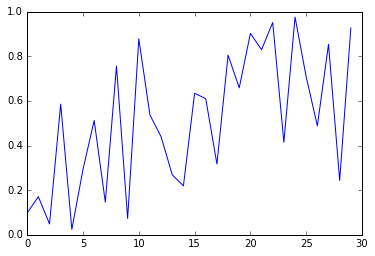

In [97]:
testdata = lcg(12,0,123,N=30)
plt.plot(testdata)

We see some data that is certainly noisy but does it look random? Check a longer data set:

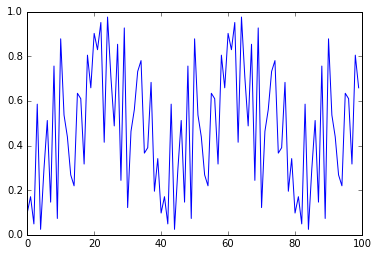

In [99]:
testdata = lcg(12,0,123,N=100)
plt.plot(testdata)

Here we start to see that this set appears periodic. How can we be sure?

## Autocorrelation:
How do we know if this is periodic or not? The autocorrelation function is a measure of how correlated a data set is with itself. For example, the $\sin^2(x)$ function is always positive and oscillates between zero and 1. It is a highly regular, periodic signal. The autocorrelation function measures the overlap or similarity between two data sets. You can think of it as a measure of the 

In [143]:
def autocorr(data):    
    autocorr = []
    for i in range(len(data)):
        autocorr.append(np.correlate(data, np.roll(data,i)))
    
    return np.array(autocorr)

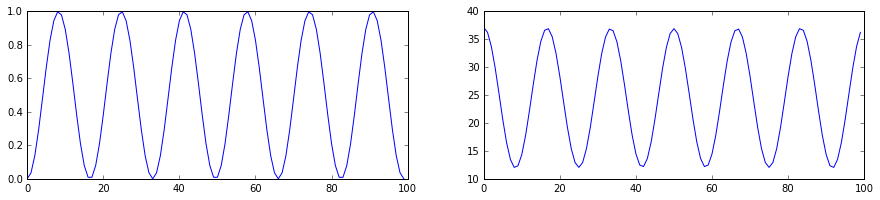

In [144]:
x = np.linspace(-3*np.pi,3*np.pi,100)
sindata = np.sin(x)**2
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(sindata)

plt.subplot(122)
plt.plot(autocorr(sindata))

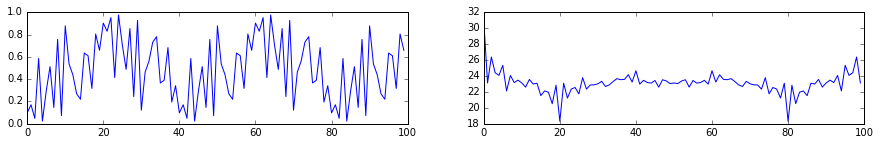

In [145]:
plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(testdata)
plt.subplot(122)
plt.plot(autocorr(testdata))

# Try other parameters in the *linear congruential generator*



In [153]:
# Solution

# The builtin methods
Below we import two random number generators (actually PRNGs).

In [146]:
import random as pyrand

In [147]:
import numpy.random as nprand

In [148]:
# Create a convenient function that uses one of these methods to generate an array of random data:
def randarray(N,a=0,b=100,method=pyrand):
    #return np.array([method.randint(a,b) for i in range(N)])
    return np.array([method.random() for i in range(N)])

In [149]:
N=10000

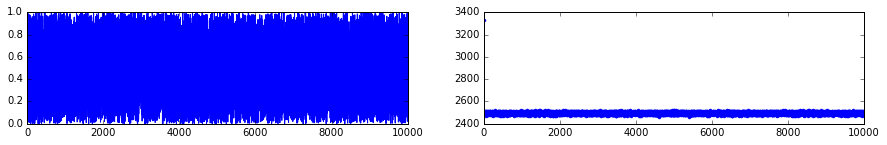

In [152]:
# Generate a random array with the python built-in.
pydata = randarray(N,method=pyrand)

plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(pydata)
plt.subplot(122)
plt.plot(autocorr(pydata),".")

## We see no structure in the correlation outside of the unshifted data.

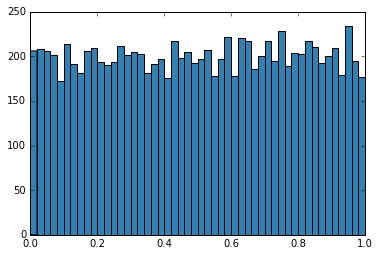

In [121]:
# Generate a random array with the python built-in.
pydata = randarray(N,method=pyrand)

grayblue = (0.2,0.5,0.7)  # a pleasant color

# Create a histogram to check the distribution:
n, bins, patches = plt.hist(pydata, bins=50, facecolor=grayblue)

#print(bins)
#pydata.sort()
#plt.plot(pydata)

In [ ]:
# Even better, do it ten times and plot them all:
for i in range(10):
    pydata = randarray(N,method=pyrand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(pydata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

Although the histogram varies each time, it is clear that the average is 100 for each bin.

## Repeat this to generate histograms for the other PRNGs (numpy, and RANDU)

In [ ]:
# Solution
for i in range(10):
    npdata = randarray(N,method=nprand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(npdata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

In [ ]:
# Implement the Randu:
def randu(N,seed=1):
    mydata = []
    x = seed
    for i in range(N):
        x = 65539*x % 2**31
        mydata.append(x / 2**31)
    return np.array(mydata)

In [ ]:
# Solution
randudata = randu(N)

n, bins, patches = plt.hist(randudata, 100, facecolor=grayblue, alpha=0.75)

In [ ]:
# Solution
for i in range(10):
    randudata = randu(N,seed=i+1)  # need to seed with different value!

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(randudata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

## Now check the autocorrelation to see how random it really is:

In [ ]:
from scipy.stats import linregress

In [ ]:
def corrFit(data):
    autocorr = np.correlate(data, data, mode='same')
    N = len(data)
    acorr = autocorr[0:N/2]

    x = range(len(acorr))
    
    plt.plot(acorr)
    regression = linregress(x,acorr)
    plt.plot(x,regression[0]*x + regression[1])
    print(regression)

In [ ]:
corrFit(pydata)

In [ ]:
corrFit(npdata)

In [ ]:
corrFit(randudata)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
%matplotlib notebook

In [ ]:
def plot3random(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = data[0:-3:3]
    ys = data[1:-2:3]
    zs = data[2:-1:3]
    ax.scatter(xs, ys, zs)

In [ ]:
plot3random(randudata)

In [ ]:
plot3random(pydata)

In [ ]:
plot3random(cdata)

In [ ]:
plot3random(npdata)